In [12]:
import matplotlib.pyplot as plt
import numpy as np
import struct
import os

%matplotlib inline
# plt.rcParams['figure.figsize'] = [10, 10]

In [13]:
def dat2nparr(dat_file_dir):
    buffer = []
    dat_file = open(dat_file_dir, "rb").read()

    for i in range(0, len(dat_file), 2):
        buffer.append(struct.unpack("<H", dat_file[i: i + 2]))

    matrix = np.reshape(np.array(buffer), (2048, 1200))

    return matrix


def split(array, nrows, ncols):
    
    w, h = array.shape
    
    splited = np.vsplit(array, nrows)
    
    for i in range(len(splited)):
        splited[i] = np.hsplit(splited[i], ncols)
        
    return np.reshape(splited, (nrows * ncols, int(w / nrows), int(h / ncols)))

In [32]:
def null_coordinate(splited_array, ncols, index=None):
    _, width, height = splited_array.shape

    if index:            
    
        null_x = width * (index % ncols)

        null_y = height * (index // ncols)
    
        return np.array((null_x, null_y))
    
    null_coordinates = []
    
    for i in range(len(splited_array)):
        
        null_x = width * (i // ncols)

        null_y = height * (i % ncols)
        
        null_coordinates.append(np.array((null_x, null_y)))
        
    return np.array(null_coordinates)
        
    

In [33]:
def center_coordinate(null_coordinates, fragment_shape):
    null_x, null_y = null_coordinates
    _, width, height = fragment_shape
    return null_x + int(width/2), null_y + int(height/2)
    

In [34]:
def grades_and_kilometers(x, y):
    grades = int((x / 2048) * 360)
    kilometers = int((y / 1200) * 360)

    return grades, kilometers

In [35]:
buffer_matrix = dat2nparr('../dat/SO_201207_153155.dat')
print(buffer_matrix.shape)

(2048, 1200)


In [36]:
splited = split(buffer_matrix, 8, 5)

In [37]:
nulls = null_coordinate(splited, ncols=5)
nulls

array([[   0,    0],
       [   0,  240],
       [   0,  480],
       [   0,  720],
       [   0,  960],
       [ 256,    0],
       [ 256,  240],
       [ 256,  480],
       [ 256,  720],
       [ 256,  960],
       [ 512,    0],
       [ 512,  240],
       [ 512,  480],
       [ 512,  720],
       [ 512,  960],
       [ 768,    0],
       [ 768,  240],
       [ 768,  480],
       [ 768,  720],
       [ 768,  960],
       [1024,    0],
       [1024,  240],
       [1024,  480],
       [1024,  720],
       [1024,  960],
       [1280,    0],
       [1280,  240],
       [1280,  480],
       [1280,  720],
       [1280,  960],
       [1536,    0],
       [1536,  240],
       [1536,  480],
       [1536,  720],
       [1536,  960],
       [1792,    0],
       [1792,  240],
       [1792,  480],
       [1792,  720],
       [1792,  960]])

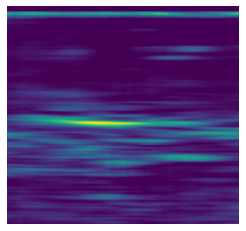

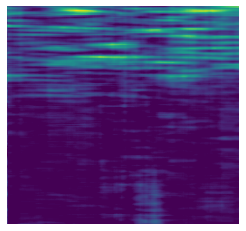

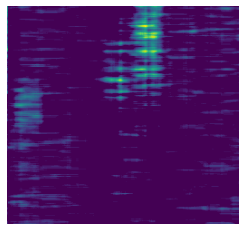

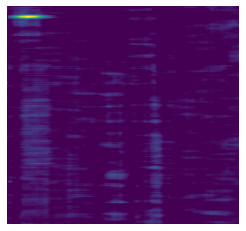

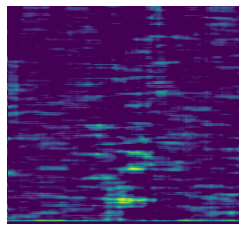

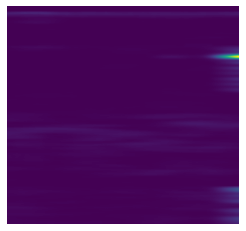

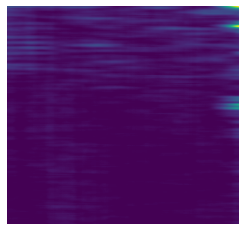

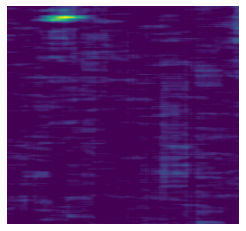

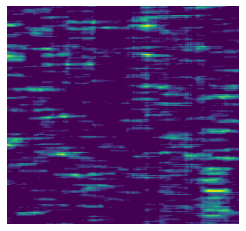

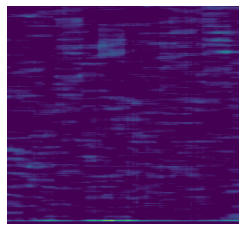

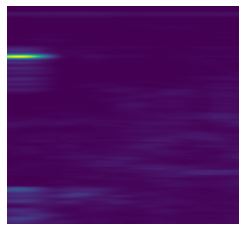

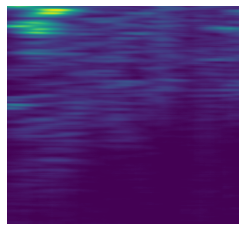

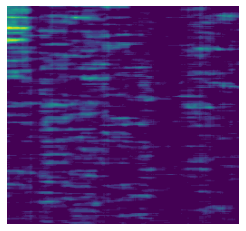

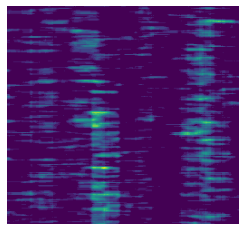

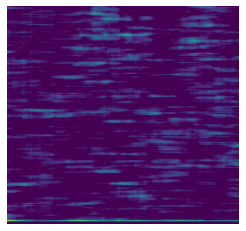

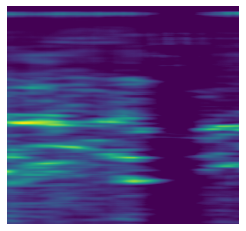

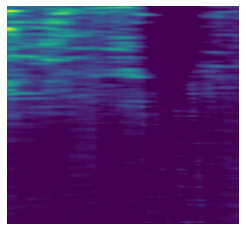

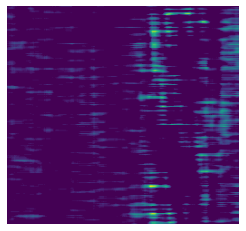

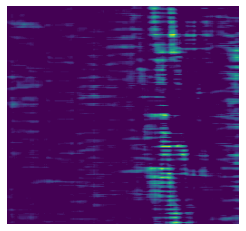

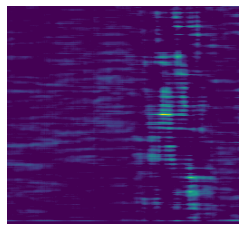

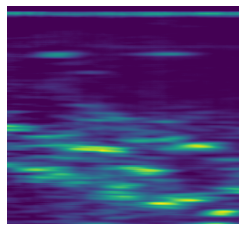

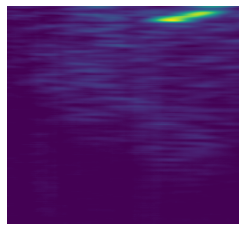

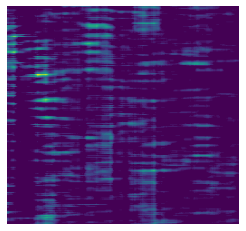

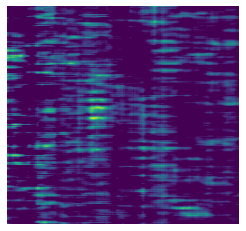

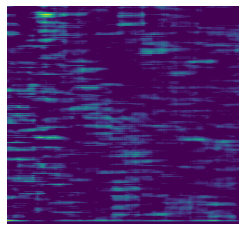

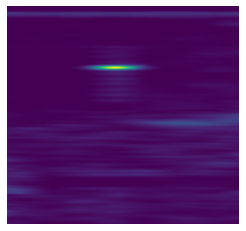

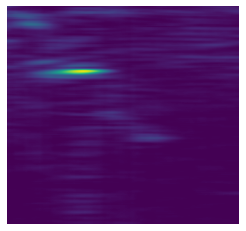

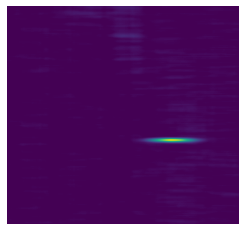

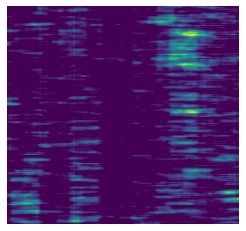

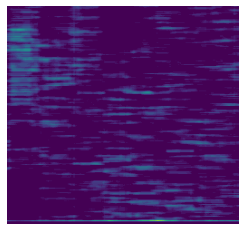

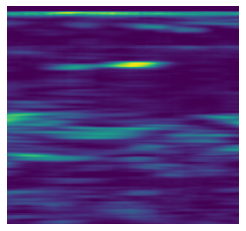

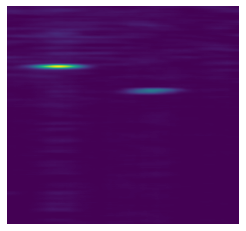

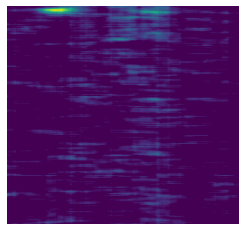

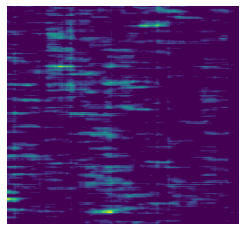

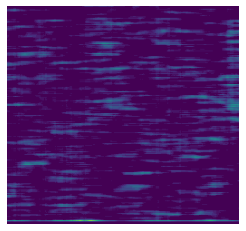

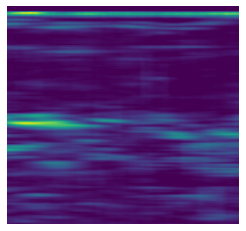

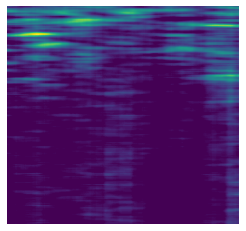

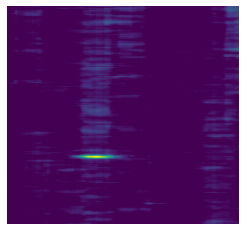

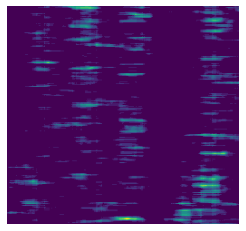

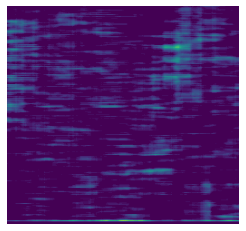

In [39]:
path = '../SO_201207_153155'
if not os.path.exists(path):
    os.mkdir(path)
for i in range(len(splited)):
    
    null_x, null_y = nulls[i]
    
    plt.imshow(splited[i].T)
    plt.axis("off")
    plt.tick_params(axis='both', left='off', top='off', right='off', bottom='off', labelleft='off', labeltop='off', labelright='off', labelbottom='off')
    
    plt.savefig(f'{path}/{i}_{null_x}_{null_y}.png', dpi=100, bbox_inches='tight', pad_inches=0.0)

    plt.show()